In [1]:
import numpy as np
import pandas as pd
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
ls

 Il volume nell'unit� C non ha etichetta.
 Numero di serie del volume: 44A5-0E5F

 Directory di c:\OC\Proj7\Implementez_un_modele_de_scoring

01/07/2023  00:21    <DIR>          .
01/07/2023  00:21    <DIR>          ..
01/07/2023  00:21    <DIR>          .github
17/03/2023  01:01                81 .gitignore
16/03/2023  13:36    <DIR>          .idea
06/03/2023  00:22    <DIR>          .ipynb_checkpoints
12/01/2023  21:01            65,264 base_libs.txt
30/05/2023  23:48    <DIR>          Data&output
01/07/2023  00:21    <DIR>          Fast_api_and_dashboard
29/06/2023  00:13               402 flask_app.py
29/06/2023  00:13             1,526 main.py
06/03/2023  00:24    <DIR>          Other_data
01/07/2023  00:21         2,101,441 Proj7.ipynb
23/02/2023  12:06                24 README.md
01/07/2023  00:21                84 Requirements.txt
12/01/2023  22:06            65,264 spec-file.txt
               8 File      2,234,086 byte
               8 Directory  40,994,050,048 byte disponibi

In [3]:
cd Data&output

c:\OC\Proj7\Implementez_un_modele_de_scoring\Data&output


In [4]:
ls

 Il volume nell'unit� C non ha etichetta.
 Numero di serie del volume: 44A5-0E5F

 Directory di c:\OC\Proj7\Implementez_un_modele_de_scoring\Data&output

30/05/2023  23:48    <DIR>          .
30/05/2023  23:48    <DIR>          ..
23/02/2023  11:56                 1 .gitignore
23/02/2023  11:37       166,133,370 application_train.csv
09/03/2023  23:43             2,654 features.joblib
30/12/2022  11:09            37,383 HomeCredit_columns_description.csv
10/02/2023  12:40             5,005 install-pyenv-win.ps1
23/02/2023  22:45           308,209 lightgbm.pkl
16/02/2023  17:28           308,269 lightgbmodel.joblib
19/02/2023  20:03           308,705 lightgbmodel-NCEL106496.joblib
01/05/2023  18:50           461,533 list_id_clients.joblib
01/05/2023  19:11           787,066 shap_explainer.joblib
16/02/2023  17:28             6,103 standardscaler.joblib
20/02/2023  23:07        66,423,105 test_data.joblib
23/02/2023  23:13        52,313,115 test_data_ok.joblib
09/03/2023  00:04        66

### Import of Train dataset

In [5]:
train_with_target = pd.read_csv('application_train.csv', nrows= None)
train_with_target

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_with_target.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train_with_target.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

### Balance between 0 and 1 clients

In [8]:
train_with_target.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [9]:
good_clients_perc = train_with_target.TARGET.value_counts()[0]/len(train_with_target.TARGET)*100
bad_clients_perc = train_with_target.TARGET.value_counts()[1]/len(train_with_target.TARGET)*100
print (' The % of good client is:',good_clients_perc,'\n','The % of bad client is:', bad_clients_perc)

 The % of good client is: 91.92711805431351 
 The % of bad client is: 8.072881945686495


### Subset of data whitout target, but WITH ID     
dataset that will be used (thanks to a fast api endpoint) to select a specific row, row that will be used (once the id column removed) to make the prediction on the pre trained Light GBM model

#### Run the following cells ONLY when exporting the dataset whith the "sk curr id"

In [10]:
train = train_with_target.drop('TARGET', axis=1)
train

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Subset of data without target and ID

Run the following cell for normal notebook execution

In [ ]:
train = train_with_target.iloc[:,2:]
train

### Analysing null data

In [11]:
train.isnull().sum()  # .sort_values(ascending=False)

SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 121, dtype: int64

In [12]:
percent_nullval = pd.DataFrame(train_with_target.isnull().sum()/len(train_with_target))   # columns=['columns','percentage']    # .sort_values(ascending=False)
percent_nullval = percent_nullval.reset_index()
percent_nullval.columns = ['columns','percentage']
percent_nullval

,columns,percentage
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,0.135016
118,AMT_REQ_CREDIT_BUREAU_WEEK,0.135016
119,AMT_REQ_CREDIT_BUREAU_MON,0.135016
120,AMT_REQ_CREDIT_BUREAU_QRT,0.135016


In [13]:
list_cols =  percent_nullval['columns'].tolist()
list_cols

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

### Import description of columns csv to properly analyse them

In [14]:
column_descr = pd.read_csv('HomeCredit_columns_description.csv', nrows= None, encoding= 'ansi')
column_descr

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
214,217,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment,NaN
215,218,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
216,219,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
217,220,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...,NaN


In [15]:
column_descr_subset = column_descr[(column_descr['Table'] == 'application_{train|test}.csv')]
column_descr_subset

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
117,120,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the...,NaN
118,121,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the...,NaN
119,122,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the...,NaN
120,123,application_{train|test}.csv,AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the...,NaN


In [16]:
column_descr_subset.loc[column_descr_subset['Row'].isin(list_cols)]['Description'].tolist()

['ID of loan in our sample',
 'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)',
 'Identification if loan is cash or revolving',
 'Gender of the client',
 'Flag if the client owns a car',
 'Flag if client owns a house or flat',
 'Number of children the client has',
 'Income of the client',
 'Credit amount of the loan',
 'Loan annuity',
 'For consumer loans it is the price of the goods for which the loan is given',
 'Who was accompanying client when he was applying for the loan',
 'Clients income type (businessman, working, maternity leave,…)',
 'Level of highest education the client achieved',
 'Family status of the client',
 'What is the housing situation of the client (renting, living with parents, ...)',
 'Normalized population of region where client lives (higher number means the client lives in more populated region)',
 "Client's age in days a

In [17]:
percent_nullval["description"] = column_descr_subset.loc[column_descr_subset['Row'].isin(list_cols)]['Description'].tolist()
percent_nullval.sort_values(by = 'percentage', ascending=False)

,columns,percentage,description
76,COMMONAREA_MEDI,0.698723,Normalized information about building where th...
48,COMMONAREA_AVG,0.698723,Normalized information about building where th...
62,COMMONAREA_MODE,0.698723,Normalized information about building where th...
70,NONLIVINGAPARTMENTS_MODE,0.694330,Normalized information about building where th...
56,NONLIVINGAPARTMENTS_AVG,0.694330,Normalized information about building where th...
...,...,...,...
15,NAME_HOUSING_TYPE,0.000000,What is the housing situation of the client (r...
14,NAME_FAMILY_STATUS,0.000000,Family status of the client
13,NAME_EDUCATION_TYPE,0.000000,Level of highest education the client achieved
12,NAME_INCOME_TYPE,0.000000,"Clients income type (businessman, working, mat..."


### Own car analysis

In [18]:
# analyse flag own car with own car age
train.loc[train['FLAG_OWN_CAR']== 'Y']['OWN_CAR_AGE'].isnull().sum() #just 5 on 104578 clients who owns a car has this missing value

5

In [19]:
train.loc[train['FLAG_OWN_CAR']== 'N']['OWN_CAR_AGE'].isnull().sum()   # 100% of own car = NO

202924

### Choosing columns to drop

In [20]:
to_drop = ['ENTRANCES_MEDI',
           'ENTRANCES_MODE',
           'ENTRANCES_AVG',
           'APARTMENTS_MODE',
           'APARTMENTS_MEDI',
           'APARTMENTS_AVG',
           'HOUSETYPE_MODE',
           'TOTALAREA_MODE',
           'HOUSETYPE_MODE',
    'NONLIVINGAREA_MODE',
           'CNT_CHILDREN',
           'NONLIVINGAREA_AVG',
           'NONLIVINGAREA_MEDI',
           'LIVINGAREA_MEDI',
           'LIVINGAREA_MODE',
           'LIVINGAREA_AVG',
           'FLOORSMIN_AVG',
           'FLAG_EMP_PHONE',
           'FLOORSMIN_MEDI',
           'FLOORSMIN_MODE',
           'FLOORSMAX_MEDI',
           'HOUR_APPR_PROCESS_START',
           'NAME_TYPE_SUITE',
           'FLOORSMAX_AVG',
           'FLOORSMAX_MODE',
           'FONDKAPREMONT_MODE',
    'DAYS_LAST_PHONE_CHANGE',
    'YEARS_BEGINEXPLUATATION_MEDI',
           'YEARS_BEGINEXPLUATATION_AVG',
           'YEARS_BEGINEXPLUATATION_MEDI',
           'YEARS_BEGINEXPLUATATION_MODE',
           'TOTALAREA_MODE',
           'EMERGENCYSTATE_MODE',
           'COMMONAREA_MODE',
           'FLAG_DOCUMENT_3',
           'FLAG_DOCUMENT_4',
           'FLAG_DOCUMENT_5',
           'FLAG_DOCUMENT_6',
           'FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8',
           'FLAG_DOCUMENT_9',
           'FLAG_DOCUMENT_10',
           'FLAG_DOCUMENT_11',
           'FLAG_DOCUMENT_12',
           'FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14',
           'FLAG_DOCUMENT_15',
           'FLAG_DOCUMENT_16',
           'FLAG_DOCUMENT_17',
           'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19',
           'FLAG_DOCUMENT_20',
           'FLAG_DOCUMENT_21',
           'COMMONAREA_MEDI',
           'COMMONAREA_AVG',
           'NONLIVINGAPARTMENTS_MEDI',
           'NONLIVINGAPARTMENTS_AVG',
           'NONLIVINGAPARTMENTS_MODE',
           'LIVINGAPARTMENTS_AVG',
           'LIVINGAPARTMENTS_MEDI',
           'LIVINGAPARTMENTS_MODE',
           'YEARS_BUILD_AVG',
           'YEARS_BUILD_MEDI',
           'YEARS_BUILD_MODE',
           'LANDAREA_MEDI',
           'LANDAREA_AVG',
           'BASEMENTAREA_MEDI',
           'BASEMENTAREA_AVG',
           'AMT_GOODS_PRICE',
           'ELEVATORS_AVG',
           'ELEVATORS_MEDI',
           'WALLSMATERIAL_MODE',
           'REGION_RATING_CLIENT_W_CITY',
           'LIVE_REGION_NOT_WORK_REGION',
           'LIVE_CITY_NOT_WORK_CITY',
           'DEF_30_CNT_SOCIAL_CIRCLE',
           'OBS_30_CNT_SOCIAL_CIRCLE',
           'OWN_CAR_AGE'
           ]

In [21]:
train_slim = train.drop(columns=to_drop)
train_slim

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,LANDAREA_MODE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,202500.0,406597.5,24700.5,Working,Secondary / secondary special,...,0.0377,2.0,2.0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,270000.0,1293502.5,35698.5,State servant,Higher education,...,0.0128,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,Working,Secondary / secondary special,...,NaN,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,135000.0,312682.5,29686.5,Working,Secondary / secondary special,...,NaN,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,121500.0,513000.0,21865.5,Working,Secondary / secondary special,...,NaN,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,Cash loans,M,N,N,157500.0,254700.0,27558.0,Working,Secondary / secondary special,...,0.0094,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,Cash loans,F,N,Y,72000.0,269550.0,12001.5,Pensioner,Secondary / secondary special,...,0.0592,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,Cash loans,F,N,Y,153000.0,677664.0,29979.0,Working,Higher education,...,NaN,6.0,0.0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,Cash loans,F,N,Y,171000.0,370107.0,20205.0,Commercial associate,Secondary / secondary special,...,NaN,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

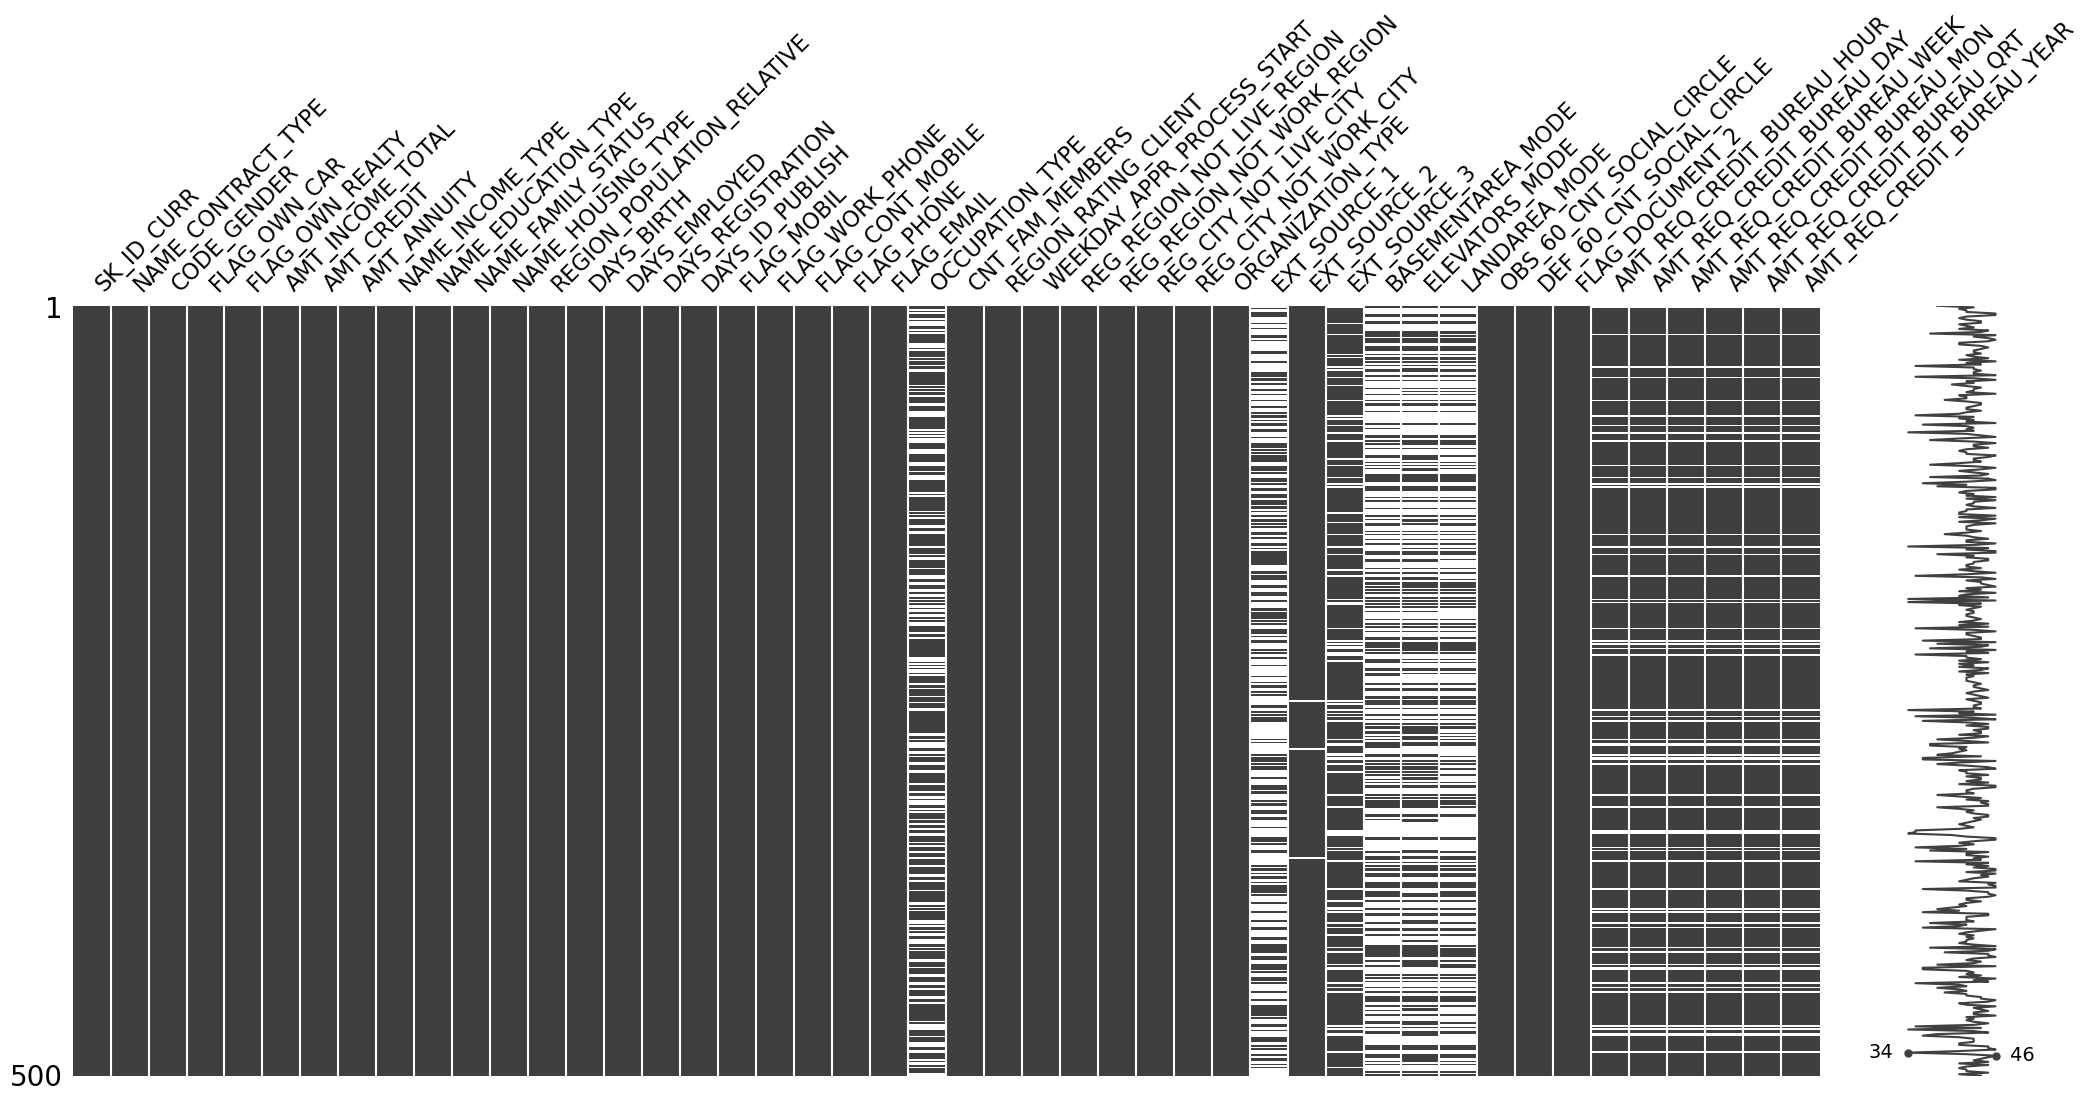

In [22]:
msno.matrix(train_slim.sample(500))

### Correlation between features

In [23]:
corr = train_slim.corr()
corr

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,...,LANDAREA_MODE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.001820,-0.000343,-0.000433,0.000849,-0.001500,0.001366,-0.000973,-0.000384,0.002804,...,0.001548,-0.001423,0.001187,0.000700,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
AMT_INCOME_TOTAL,-0.001820,1.000000,0.156870,0.191657,0.074796,0.027261,-0.064223,0.027805,0.008506,0.000325,...,-0.003674,-0.013015,-0.013135,-0.001000,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,0.156870,1.000000,0.770138,0.099738,-0.055436,-0.066838,0.009621,-0.006575,0.001436,...,0.002532,0.000239,-0.023767,0.008905,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
AMT_ANNUITY,-0.000433,0.191657,0.770138,1.000000,0.118429,0.009445,-0.104332,0.038514,0.011268,0.000149,...,0.003621,-0.011731,-0.024001,0.003397,0.003861,0.002185,0.013881,0.039148,0.010124,-0.011320
REGION_POPULATION_RELATIVE,0.000849,0.074796,0.099738,0.118429,1.000000,-0.029582,-0.003980,-0.053820,-0.003993,0.001333,...,-0.060558,-0.010638,0.002404,-0.003040,-0.002225,0.001399,-0.002149,0.078607,-0.001279,0.001003
DAYS_BIRTH,-0.001500,0.027261,-0.055436,0.009445,-0.029582,1.000000,-0.615864,0.331912,0.272691,-0.003084,...,0.003800,0.007023,0.001925,-0.001191,0.005285,0.002255,-0.001336,0.001372,-0.011799,-0.071983
DAYS_EMPLOYED,0.001366,-0.064223,-0.066838,-0.104332,-0.003980,-0.615864,1.000000,-0.210242,-0.272378,0.000818,...,-0.008758,0.005888,0.014211,-0.003090,-0.004735,0.000472,0.003072,-0.034457,0.015345,0.049988
DAYS_REGISTRATION,-0.000973,0.027805,0.009621,0.038514,-0.053820,0.331912,-0.210242,1.000000,0.101896,-0.000100,...,0.003354,0.009088,0.004538,-0.004466,-0.002855,-0.000508,-0.001069,-0.011353,-0.001308,-0.024805
DAYS_ID_PUBLISH,-0.000384,0.008506,-0.006575,0.011268,-0.003993,0.272691,-0.272378,0.101896,1.000000,-0.002293,...,-0.008026,-0.012874,0.004328,-0.000349,0.004761,-0.000999,-0.001249,-0.009660,-0.006200,-0.035099
FLAG_MOBIL,0.002804,0.000325,0.001436,0.000149,0.001333,-0.003084,0.000818,-0.000100,-0.002293,1.000000,...,-0.000618,0.001067,0.000499,0.000012,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

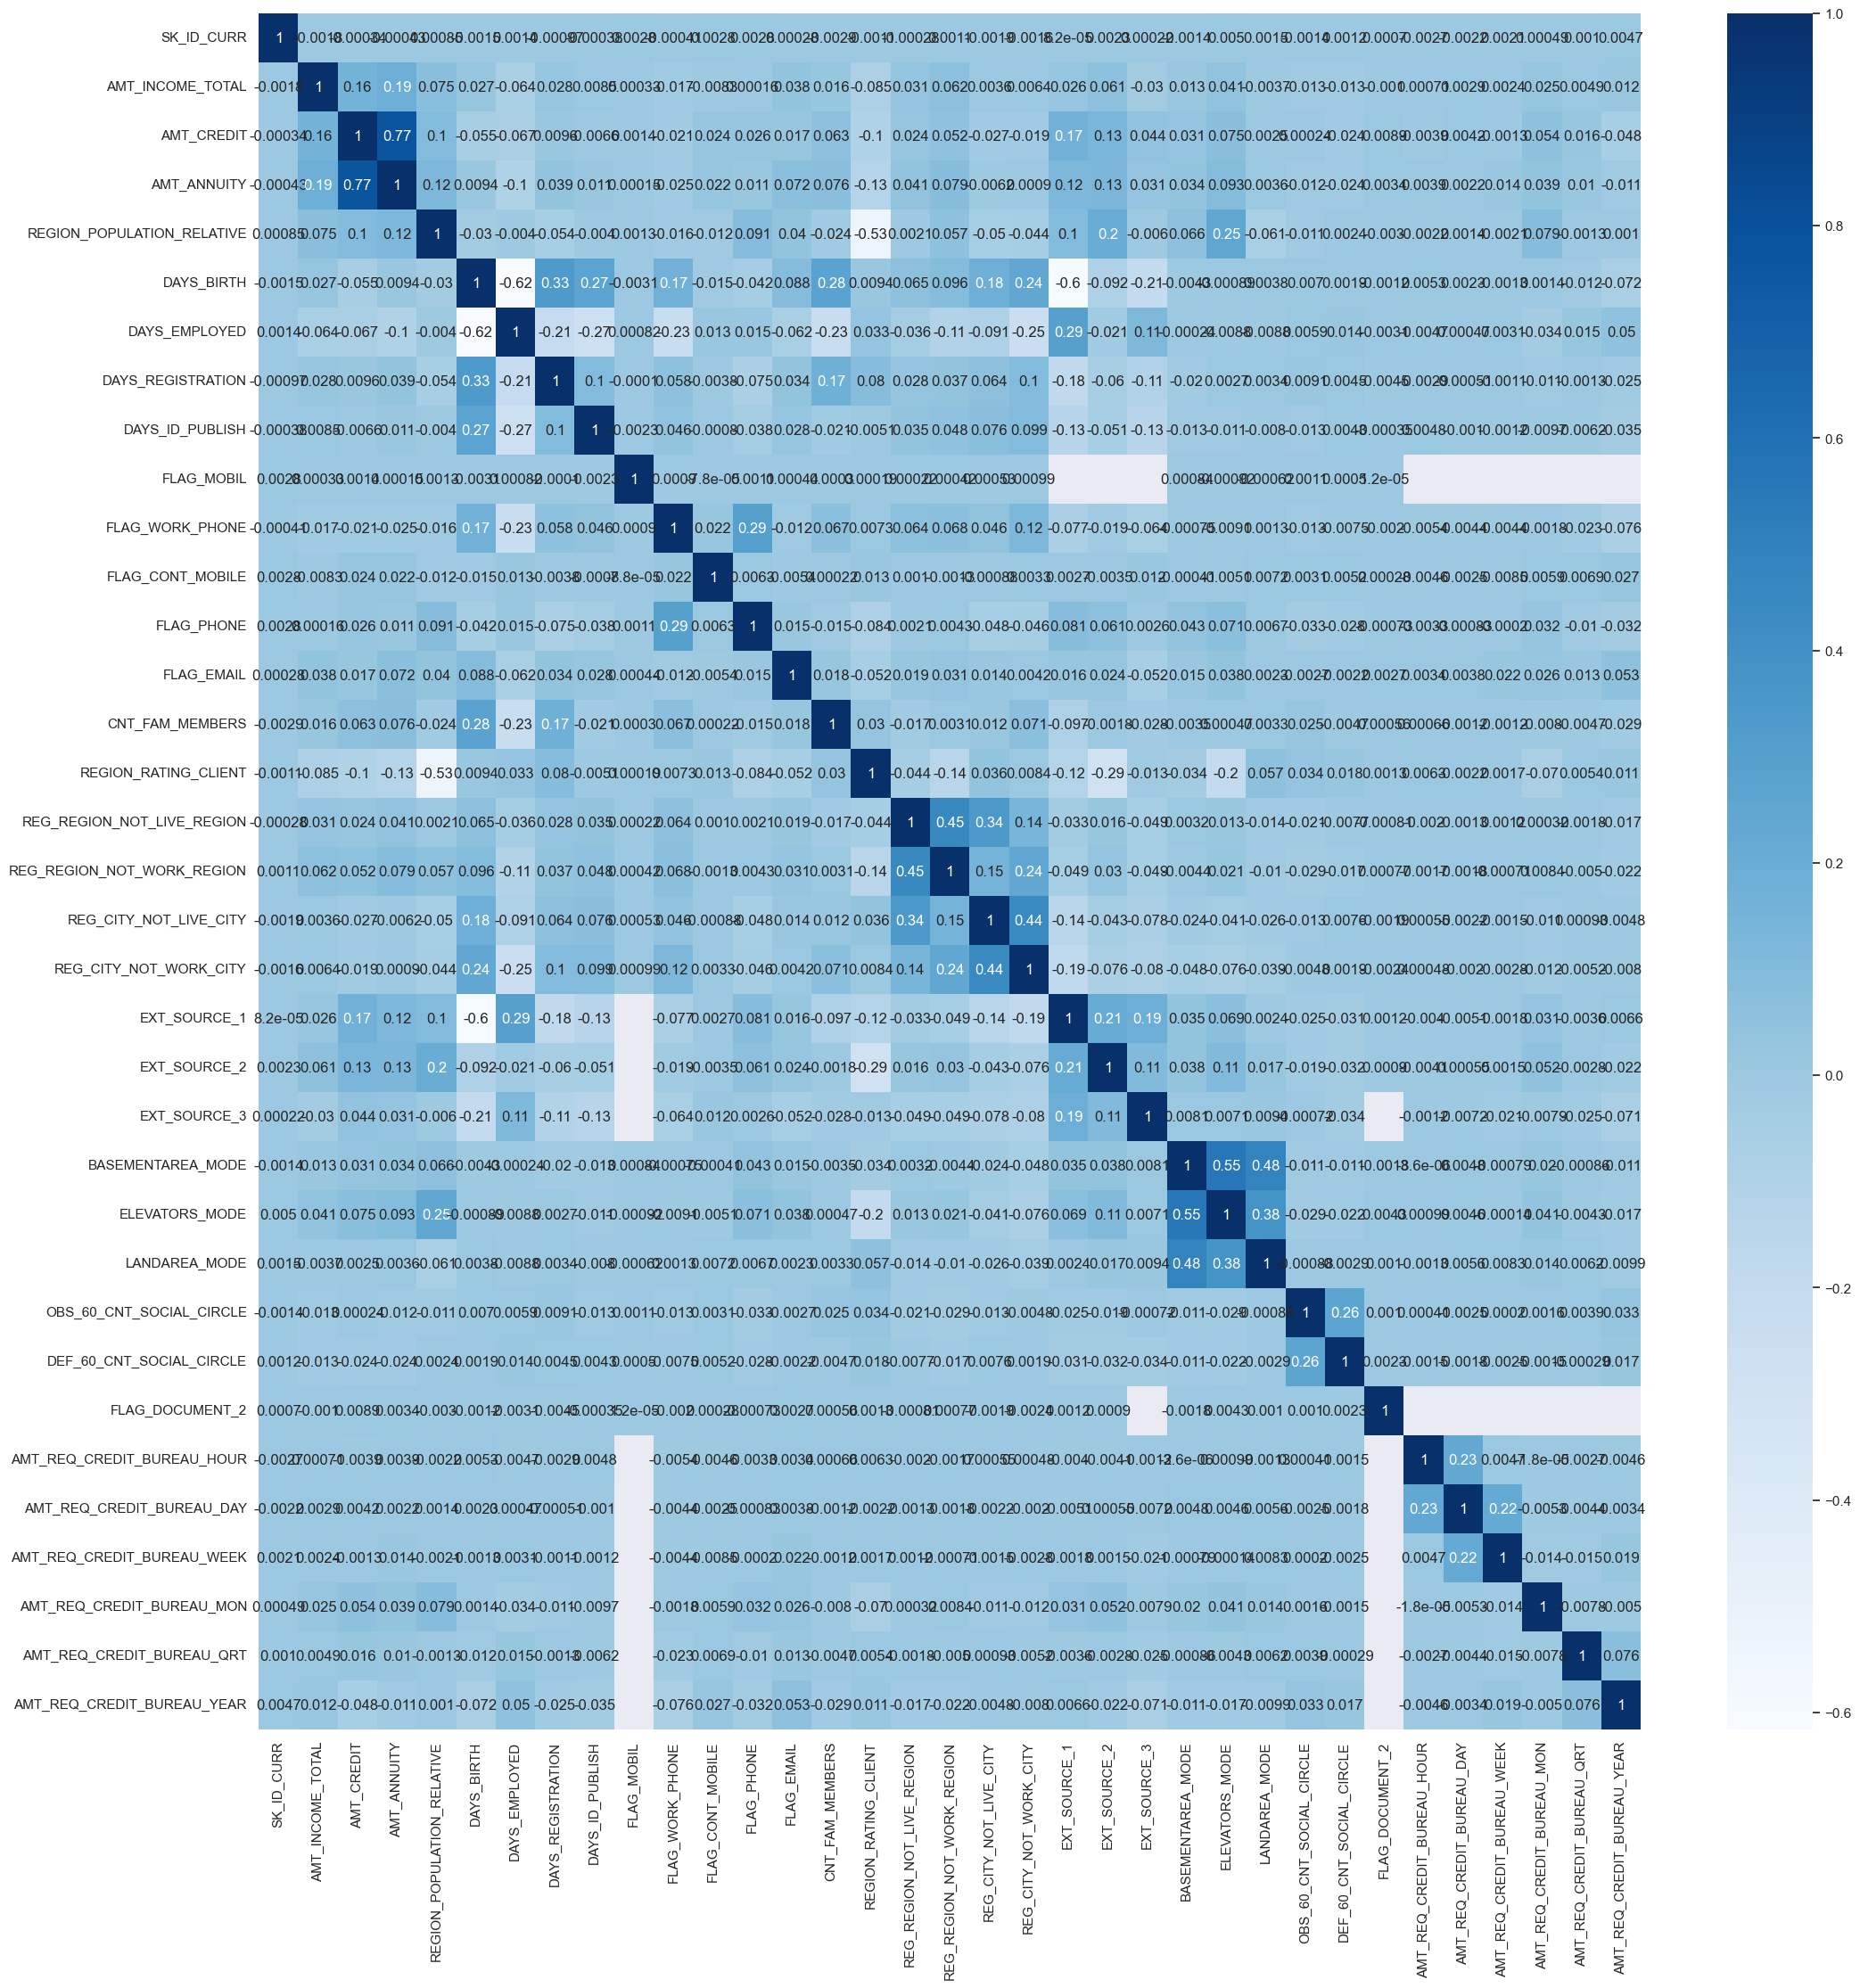

In [24]:
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(corr, cmap="Blues", annot=True)

In [25]:
train_slim.isnull().sum()

SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
WEEKDAY_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION         0
R

### Substitution of nan with 0 in selected columns

In [26]:
train_slim = train_slim.fillna({'EXT_SOURCE_1':0,
'EXT_SOURCE_2':0,
'EXT_SOURCE_3':0,
'BASEMENTAREA_MODE':0,
'ELEVATORS_MODE':0,
'LANDAREA_MODE':0})

train_slim.isnull().sum()

# 'YEARS_BUILD_MODE':0,
# 'COMMONAREA_MODE':0,
# 'LIVINGAPARTMENTS_MODE':0,
# 'NONLIVINGAPARTMENTS_MODE':0})

SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
REGION_RATING_CLIENT              0
WEEKDAY_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION  

### Substitution of other columns nans with mode

In [27]:
train_slim['CNT_FAM_MEMBERS'] = train_slim['CNT_FAM_MEMBERS'].fillna(train_slim['CNT_FAM_MEMBERS'].mode()[0])
train_slim['OCCUPATION_TYPE'] = train_slim['OCCUPATION_TYPE'].fillna(train_slim['OCCUPATION_TYPE'].mode()[0])
train_slim['OBS_60_CNT_SOCIAL_CIRCLE'] = train_slim['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(train_slim['OBS_60_CNT_SOCIAL_CIRCLE'].mode()[0])
train_slim['DEF_60_CNT_SOCIAL_CIRCLE'] = train_slim['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(train_slim['DEF_60_CNT_SOCIAL_CIRCLE'].mode()[0])
train_slim[['AMT_ANNUITY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']] = train_slim[['AMT_ANNUITY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].fillna(train_slim[['AMT_ANNUITY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].median())

In [28]:
train_slim.isnull().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
FLAG_MOBIL                    0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
WEEKDAY_APPR_PROCESS_START    0
REG_REGION_NOT_LIVE_REGION    0
REG_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY        0
REG_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE             0
EXT_SOUR

### Application of kaggle Kernel

In [29]:
# extraction of kernel functions to use as first steps

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} - done in {:.0f}s".format(title, time.time() - t0))

# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Preprocess application_train.csv
# edit: modify this function to apply it at train dataset then eventually re use it when I need to split it in train and test , not in the first moment
def application_train(num_rows = None, nan_as_category = False):
    # Read data and merge
    # train_df = pd.read_csv('application_train.csv', nrows= num_rows)
    df = train_slim   # change name of assigned df based on needs, train_with_target is the untouched one
    
    print("Train samples: {}".format(len(df)))
    # Optional: Remove 4 applications with XNA CODE_GENDER (train set)
    # df = df[df['CODE_GENDER'] != 'XNA']
    
    # Categorical features with Binary encode (0 or 1; two categories)
    for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
        df[bin_feature], uniques = pd.factorize(df[bin_feature])
    # Categorical features with One-Hot encode
    df, cat_cols = one_hot_encoder(df, nan_as_category)
    
    # NaN values for DAYS_EMPLOYED: 365.243 -> nan
    df['DAYS_EMPLOYED'].replace(365243, np.nan, inplace= True)
    # Some simple new features (percentages)
    df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
    df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
    df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
    gc.collect()
    return df

In [30]:
train_feat_eng = application_train()

Train samples: 307511


In [31]:
# applicatin partie modeles, diviser le dataset en train et test et validation 

# recherche des hyperparametres par exemple avec grid search cv, faire la cross validation 

# light gbm a tester, regression logistique, random forest
train_feat_eng.drop(['DAYS_EMPLOYED','DAYS_BIRTH','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT'], inplace=True, axis=1)

In [32]:
train_feat_eng.isnull().sum()   # .describe()

SK_ID_CURR                        0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
REGION_POPULATION_RELATIVE        0
                              ...  
DAYS_EMPLOYED_PERC            55374
INCOME_CREDIT_PERC                0
INCOME_PER_PERSON                 0
ANNUITY_INCOME_PERC               0
PAYMENT_RATE                      0
Length: 147, dtype: int64

In [33]:
# to further explore this choice
# train_feat_eng['DAYS_EMPLOYED'] = train_feat_eng['DAYS_EMPLOYED'].fillna(train_feat_eng['DAYS_EMPLOYED'].mode()[0])
train_feat_eng['DAYS_EMPLOYED_PERC'] = train_feat_eng['DAYS_EMPLOYED_PERC'].fillna(train_feat_eng['DAYS_EMPLOYED_PERC'].median())

In [34]:
train_feat_eng.shape

(307511, 147)

### Separation in X and y set, train-test-split

In [35]:
#! pip install imblearn

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif

In [37]:
X = train_feat_eng # .iloc[:,2:] not necessary now because I've already removed the target at the beginning
y = train_with_target['TARGET']
features_cols = X.columns
X

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,100002,0,0,0,0.018801,-3648.0,-2120,1,0,1,...,0,0,0,0,0,0.067329,0.498036,202500.0,0.121978,0.060749
1,100003,1,0,1,0.003541,-1186.0,-291,1,0,1,...,0,0,0,0,0,0.070862,0.208736,135000.0,0.132217,0.027598
2,100004,0,1,0,0.010032,-4260.0,-2531,1,1,1,...,0,0,0,0,0,0.011814,0.500000,67500.0,0.100000,0.050000
3,100006,1,0,0,0.008019,-9833.0,-2437,1,0,1,...,0,0,0,0,0,0.159905,0.431748,67500.0,0.219900,0.094941
4,100007,0,0,0,0.028663,-4311.0,-3458,1,0,1,...,0,0,0,0,0,0.152418,0.236842,121500.0,0.179963,0.042623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0.032561,-8456.0,-1982,1,0,1,...,0,0,0,0,0,0.025303,0.618375,157500.0,0.174971,0.108198
307507,456252,1,0,0,0.025164,-4388.0,-4090,1,0,1,...,0,0,0,0,1,0.118733,0.267112,72000.0,0.166687,0.044524
307508,456253,1,0,0,0.005002,-6737.0,-5150,1,0,1,...,0,0,0,0,0,0.529266,0.225776,153000.0,0.195941,0.044239
307509,456254,1,0,0,0.005313,-2562.0,-931,1,0,1,...,0,0,0,0,0,0.400134,0.462029,85500.0,0.118158,0.054592


### Select k best features directly from X and Y

In [38]:
# Create and fit selector
selectorr = SelectKBest(f_classif, k=90)
selectorr.fit(X,y)
# Get columns to keep and create new dataframe with those only
cols = selectorr.get_support(indices=True)
X_new = X.iloc[:,cols]
X_new

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,DAYS_EMPLOYED_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,0,0,0,0.018801,-3648.0,-2120,0,1,2,0,...,0,0,0,0,0,0,0.067329,202500.0,0.121978,0.060749
1,1,0,1,0.003541,-1186.0,-291,0,1,1,0,...,0,0,0,0,0,0,0.070862,135000.0,0.132217,0.027598
2,0,1,0,0.010032,-4260.0,-2531,1,1,2,0,...,0,0,0,0,0,0,0.011814,67500.0,0.100000,0.050000
3,1,0,0,0.008019,-9833.0,-2437,0,0,2,0,...,0,0,0,0,0,0,0.159905,67500.0,0.219900,0.094941
4,0,0,0,0.028663,-4311.0,-3458,0,0,2,0,...,0,0,0,0,0,0,0.152418,121500.0,0.179963,0.042623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,1,0.032561,-8456.0,-1982,0,0,1,0,...,0,0,0,0,0,0,0.025303,157500.0,0.174971,0.108198
307507,1,0,0,0.025164,-4388.0,-4090,0,1,2,0,...,0,0,0,0,0,1,0.118733,72000.0,0.166687,0.044524
307508,1,0,0,0.005002,-6737.0,-5150,0,0,3,0,...,0,0,0,0,0,0,0.529266,153000.0,0.195941,0.044239
307509,1,0,0,0.005313,-2562.0,-931,0,0,2,0,...,0,0,0,0,0,0,0.400134,85500.0,0.118158,0.054592


In [39]:
# X_new = SelectKBest(mutual_info_classif, k = 80).fit_transform(X,y)
features_colss = X_new.columns
X_new.shape

(307511, 90)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y,
                                                    test_size = 0.3,
                                                    random_state = 6)

In [41]:
X_train.shape, X_test.shape

((215257, 90), (92254, 90))

In [42]:
X_test

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,DAYS_EMPLOYED_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
201658,1,0,0,0.018029,-6718.0,-326,0,0,3,0,...,0,0,0,0,0,0,0.597450,75000.0,0.123640,0.092148
299253,1,1,0,0.028663,-208.0,-4447,0,1,2,0,...,0,0,0,0,0,0,0.041081,92250.0,0.132732,0.036931
23676,1,0,0,0.024610,-1524.0,-3995,0,0,2,0,...,0,0,0,0,0,1,0.118733,112500.0,0.172880,0.048102
29875,0,1,1,0.025164,-3746.0,-2156,0,0,2,0,...,0,0,0,0,0,0,0.234085,45000.0,0.066667,0.050000
9612,1,0,1,0.031329,-2848.0,-2854,1,1,2,0,...,0,0,0,0,0,0,0.204406,20250.0,0.182111,0.057915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239532,0,1,0,0.046220,-1543.0,-4779,0,0,1,0,...,0,0,0,0,0,0,0.124076,180000.0,0.131312,0.038194
157793,1,0,0,0.014520,-6944.0,-1645,0,0,2,0,...,0,0,0,0,0,0,0.027954,90000.0,0.087000,0.031636
148954,1,0,0,0.031329,-2324.0,-991,0,0,2,0,...,0,0,0,0,0,0,0.043236,184500.0,0.117610,0.079477
104381,1,1,1,0.014520,-2803.0,-3633,1,1,2,0,...,0,0,0,0,0,0,0.428220,45000.0,0.292400,0.029240


### !!!! Adding sk curr id to X_test to use it with SHAP # run it only at the end when using shap

In [ ]:
X_test.insert(0, 'SK_ID_CURR', X['SK_ID_CURR'])
X_test

### Scaling data with StandardScaler

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 0.71977446, -0.71987857,  1.50367051, ..., -0.02935865,
         0.46189274, -1.1622507 ],
       [ 0.71977446, -0.71987857, -0.66503931, ...,  1.17769075,
        -1.24375697, -0.51070176],
       [-1.38915187,  1.38912316, -0.66503931, ..., -0.37135598,
        -0.85292657,  0.05408736],
       ...,
       [ 0.71977446,  1.38912316, -0.66503931, ..., -0.1299461 ,
        -0.30286775, -0.23775181],
       [-1.38915187,  1.38912316, -0.66503931, ..., -0.43170845,
         1.26064762, -0.10699927],
       [ 0.71977446, -0.71987857,  1.50367051, ..., -0.49206092,
        -1.45026956, -0.6451812 ]])

In [44]:
X_test_scaled

array([[ 0.71977446, -0.71987857, -0.66503931, ..., -0.16347525,
        -0.60612794,  1.70989857],
       [ 0.71977446,  1.38912316, -0.66503931, ..., -0.00924116,
        -0.50997375, -0.74657241],
       [ 0.71977446, -0.71987857, -0.66503931, ...,  0.17181625,
        -0.08536408, -0.24959748],
       ...,
       [ 0.71977446, -0.71987857, -0.66503931, ...,  0.81557593,
        -0.669904  ,  1.14618343],
       [ 0.71977446,  1.38912316,  1.50367051, ..., -0.43170845,
         1.17868337, -1.08875262],
       [-1.38915187,  1.38912316, -0.66503931, ..., -0.43170845,
        -1.2968134 , -0.16517623]])

In [45]:
# adding column names on the numpy array
X_test_scld_cols = pd.DataFrame(X_test_scaled, columns=features_colss) # feature_colss contains 90 features, excluding the SK ID CURR, 
                                                                       # that I will add in the next cell
X_test_scld_cols

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,DAYS_EMPLOYED_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,0.719774,-0.719879,-0.665039,-0.207177,-0.492679,1.768406,-0.498937,-0.625917,1.861322,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,3.676623,-0.163475,-0.606128,1.709899
1,0.719774,1.389123,-0.665039,0.561201,1.355237,-0.963675,-0.498937,1.597656,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-0.894501,-0.009241,-0.509974,-0.746572
2,0.719774,-0.719879,-0.665039,0.268345,0.981680,-0.664015,-0.498937,-0.625917,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,2.135593,-0.256516,0.171816,-0.085364,-0.249597
3,-1.389152,1.389123,1.503671,0.308375,0.350947,0.555179,-0.498937,-0.625917,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,0.691218,-0.431708,-1.208680,-0.165176
4,0.719774,-0.719879,1.503671,0.753838,0.605852,0.092429,2.004261,1.597656,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,0.447371,-0.653001,0.012264,0.186957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92249,-1.389152,1.389123,-0.665039,1.829814,0.976286,-1.183780,-0.498937,-0.625917,-2.067397,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-0.212616,0.775341,-0.524983,-0.690391
92250,0.719774,-0.719879,-0.665039,-0.460726,-0.556831,0.893955,-0.498937,-0.625917,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-1.002355,-0.029359,-0.993634,-0.982143
92251,0.719774,-0.719879,-0.665039,0.753838,0.754593,1.327534,-0.498937,-0.625917,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-0.876795,0.815576,-0.669904,1.146183
92252,0.719774,1.389123,1.503671,-0.460726,0.618625,-0.424021,2.004261,1.597656,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,2.286232,-0.431708,1.178683,-1.088753


### adding sk curr id to x_new  (run ONLY when exporting the dataframe with the sk curr ID)

In [46]:

X_test_scld_cols.insert(0, 'SK_ID_CURR', X['SK_ID_CURR'])

X_test_scld_cols

,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,DAYS_EMPLOYED_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,100002,0.719774,-0.719879,-0.665039,-0.207177,-0.492679,1.768406,-0.498937,-0.625917,1.861322,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,3.676623,-0.163475,-0.606128,1.709899
1,100003,0.719774,1.389123,-0.665039,0.561201,1.355237,-0.963675,-0.498937,1.597656,-0.103038,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-0.894501,-0.009241,-0.509974,-0.746572
2,100004,0.719774,-0.719879,-0.665039,0.268345,0.981680,-0.664015,-0.498937,-0.625917,-0.103038,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,2.135593,-0.256516,0.171816,-0.085364,-0.249597
3,100006,-1.389152,1.389123,1.503671,0.308375,0.350947,0.555179,-0.498937,-0.625917,-0.103038,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,0.691218,-0.431708,-1.208680,-0.165176
4,100007,0.719774,-0.719879,1.503671,0.753838,0.605852,0.092429,2.004261,1.597656,-0.103038,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,0.447371,-0.653001,0.012264,0.186957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92249,207117,-1.389152,1.389123,-0.665039,1.829814,0.976286,-1.183780,-0.498937,-0.625917,-2.067397,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-0.212616,0.775341,-0.524983,-0.690391
92250,207118,0.719774,-0.719879,-0.665039,-0.460726,-0.556831,0.893955,-0.498937,-0.625917,-0.103038,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-1.002355,-0.029359,-0.993634,-0.982143
92251,207119,0.719774,-0.719879,-0.665039,0.753838,0.754593,1.327534,-0.498937,-0.625917,-0.103038,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-0.876795,0.815576,-0.669904,1.146183
92252,207120,0.719774,1.389123,1.503671,-0.460726,0.618625,-0.424021,2.004261,1.597656,-0.103038,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,2.286232,-0.431708,1.178683,-1.088753


### MODEL SELECTION smote + model inside pipeline to handle imbalanced dataset

### Logistic regression

In [ ]:
# remember to add time calculations for each model

In [ ]:
# parameter grid
params1 = {'verbose': [2],
    'classification__penalty' : ['l1', 'l2'],
           'classification__C' : np.logspace(-4, 4, 20),
           'classification__solver' : ['liblinear']}

    #   { 'classification__penalty' : ['l1','l2'],        'classification__C'  : np.logspace(-3,3,7),       'classification__solver'  : ['saga','lbfgs', 'liblinear']  }

In [ ]:
logisticmodel = Pipeline([
    ('sampling', SMOTE(sampling_strategy=0.20)),
    ('classification', LogisticRegression())
])

grid1 = GridSearchCV(logisticmodel, param_grid = params1, scoring = 'roc_auc')
grid1.fit(X_train_scaled, y_train)

In [ ]:
logisticmodel.get_params().keys()

In [ ]:
grid1.best_params_

#### Logistic Regression score

In [ ]:
grid1.best_score_

In [ ]:
grid1.best_estimator_.score(X_test_scaled,y_test)

### Lightgbm

In [ ]:
params2 = {'verbose':[2],
    'classification__learning_rate': [0.2,0.3,0.4],
           'classification__max_depth': [1,3,5],
           'classification__n_estimators':[100,300],
           'classification__num_leaves': [20,31],
           'classification__subsample': [0.4,0.8]}

In [ ]:
lightgbmodel = Pipeline([
    ('sampling', SMOTE(sampling_strategy=0.25)),    # rajouter ............... SMOTE(sampling_strategy=0.20) sinon trop violent reequilibre
    ('classification', lgb.LGBMClassifier())
])

grid2 = GridSearchCV(lightgbmodel, params2, scoring = 'roc_auc')
grid2.fit(X_train_scaled, y_train)

In [ ]:
lightgbmodel.get_params().keys()


In [ ]:
grid2.best_params_

In [ ]:
# grid2.predict(X_train_scaled)

#### Predict proba light gbm

In [ ]:
grid2.predict_proba(X_test_scaled)

In [ ]:
# voir pouir chaque seuil quei va me rembourser, avoir un colonne par seuil, voir d apres le proa qui va rembourser ou pas , arriver a voir le nombre de faux positif et le nombre de faux negatif, appliquer un coefficient , calculer un  cout pour chaque seuil, et voir quel seuil cout le moin

#### Light GBM Score

In [ ]:
grid2.best_score_

In [ ]:
grid2.best_estimator_.score(X_test_scaled,y_test)

### Random forest

In [ ]:
# Number of trees in random forest
n_estimators = [400]   # int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)
# Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,5]
# Minimum number of samples required to split a node
min_samples_split = [100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [200]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
params3 = {'classification__n_estimators': n_estimators,
           'classification__max_depth': max_depth,
           'classification__min_samples_split': min_samples_split,
           'classification__min_samples_leaf': min_samples_leaf,
           'classification__bootstrap': bootstrap,
           'classification__verbose':[2],
           'classification__n_jobs':[-1],
           'classification__warm_start':[True]}

In [ ]:
randformodel = Pipeline([
    ('sampling', SMOTE(sampling_strategy=0.20)),
    ('classification', RandomForestClassifier())
])

grid3 = GridSearchCV(randformodel, params3, scoring = 'roc_auc',verbose= 3)
grid3.fit(X_train_scaled, y_train)

In [ ]:
randformodel.get_params().keys()

In [ ]:
grid3.best_params_

#### Random Forest score

In [ ]:
grid3.best_score_

In [ ]:
grid3.best_estimator_.score(X_test_scaled,y_test)

#### RF Predict proba

In [ ]:
grid3.predict_proba(X_test)

### MODEL CHOOSED: LIGHT GBM

#### (not necessary) Re running pipeline with LightGBM best grid parameters, and scaler too
not necessary as I need to export 2 objects, the standard scaler and the model needs to be exported separately

In [47]:
pipe_lgbm = Pipeline([
    ('scaler', StandardScaler()),
    ('sampling', SMOTE(sampling_strategy=0.20)),
    ('classification', lgb.LGBMClassifier(**grid2.best_params_))
])

NameError: name 'grid2' is not defined

In [ ]:
pipe_lgbm.fit(X_train,y_train)

In [ ]:
pipe_lgbm.score(X_test,y_test)

### Running SMOTE and Light GBM  without passing through the pipeline and the gridsearch cv

In [47]:
oversample = SMOTE(sampling_strategy=0.30)

In [48]:
X_train_smote,y_train_smote = oversample.fit_resample(X_train_scaled, y_train)

In [49]:
from collections import Counter
# summarize the new class distribution
counter = Counter(y_train_smote)
print(counter)

Counter({0: 197798, 1: 59339})


In [50]:
# grid2.best_params_

In [51]:
light_best_params = {'learning_rate': 0.3,
                     'max_depth': 3,
                     'n_estimators': 300,
                     'num_leaves': 20,
                     'subsample': 0.8,
                     'verbose': 2,
                     'metric':'auc'}

In [52]:
light_for_shap = lgb.LGBMClassifier(**light_best_params)

In [53]:
X_train_smote.shape

(257137, 90)

In [54]:
light_for_shap.fit(X_train_smote, y_train_smote)

[LightGBM] [Info] Number of positive: 59339, number of negative: 197798
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.925141
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.725395
[LightGBM] [Debug] init for col-wise cost 0.084504 seconds, init for row-wise cost 0.098216 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.109561 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12177
[LightGBM] [Info] Number of data points in the train set: 257137, number of used features: 88
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230768 -> initscore=-1.203980
[LightGBM] [Info] Start training from score -1.203980
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 3
[LightGBM] [Debug] Trained a tree with leaves = 8 a

LGBMClassifier(learning_rate=0.3, max_depth=3, metric='auc', n_estimators=300,
               num_leaves=20, subsample=0.8, verbose=2)

In [55]:
y_score = light_for_shap.predict_proba(X_test_scaled)[:, 1]
y_score

array([0.23011953, 0.06471408, 0.06671003, ..., 0.08021441, 0.04819003,
       0.02233401])

Roc auc score 

In [56]:
# see the result for curiosity 
from sklearn import metrics

accuracy = metrics.roc_auc_score(y_test, y_score)

print(accuracy)

0.759553130050417


### Exporting dataframe (x test scaled) that will be used for doing the prediction on fastapi

In [ ]:
joblib.dump(X_test_scld_cols, 'X_tst_sld_skid.joblib')

In [74]:
import joblib
joblib.dump(input_data_scaled, 'input_data_scaled.joblib')  

['input_data_scaled.joblib']

### Testing the function to filter the dataframe on the sk id curr that returns the prediction 

In [57]:
len(features_colss)

90

In [58]:
### ADD A CELL WHERE I EXECUTE THIS,    input_data_scaled.set_index('SK_ID_CURR', inplace=True)
#### THEN, TEST IF THIS WORKS   selected_customer = input_data_scaled.loc[id_client].drop('SK_ID_CURR', errors='ignore')
### AND RE EXPORT THE NEW LIST IF NECESSARY, TO BE USED IN STREAMLIT APPLICATION!!!!!!

NameError: name 'input_data_scaled' is not defined

In [58]:
id_list = X_test_scld_cols.SK_ID_CURR.tolist()
id_list

[100002,
 100003,
 100004,
 100006,
 100007,
 100008,
 100009,
 100010,
 100011,
 100012,
 100014,
 100015,
 100016,
 100017,
 100018,
 100019,
 100020,
 100021,
 100022,
 100023,
 100024,
 100025,
 100026,
 100027,
 100029,
 100030,
 100031,
 100032,
 100033,
 100034,
 100035,
 100036,
 100037,
 100039,
 100040,
 100041,
 100043,
 100044,
 100045,
 100046,
 100047,
 100048,
 100049,
 100050,
 100051,
 100052,
 100053,
 100054,
 100055,
 100056,
 100058,
 100059,
 100060,
 100061,
 100062,
 100063,
 100064,
 100068,
 100069,
 100070,
 100071,
 100072,
 100073,
 100075,
 100076,
 100077,
 100078,
 100079,
 100080,
 100081,
 100082,
 100083,
 100084,
 100085,
 100086,
 100087,
 100088,
 100089,
 100093,
 100094,
 100095,
 100096,
 100097,
 100098,
 100099,
 100100,
 100101,
 100102,
 100103,
 100104,
 100105,
 100108,
 100110,
 100111,
 100112,
 100113,
 100114,
 100115,
 100116,
 100118,
 100119,
 100120,
 100121,
 100122,
 100123,
 100124,
 100125,
 100126,
 100127,
 100129,
 100130,
 

In [59]:
import random

random.choice(id_list)

144536

In [60]:
# Seleziona i dati del cliente specificato dall'ID
esempio_riga = X_test_scld_cols[X_test_scld_cols['SK_ID_CURR'] == 131928].drop('SK_ID_CURR', axis=1) # X_test_scld_cols.loc[X_test_scld_cols['SK_ID_CURR'] == random.choice(id_list)].drop(['SK_ID_CURR'], axis=1)
esempio_riga

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,DAYS_EMPLOYED_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
27466,-1.389152,-0.719879,1.503671,-0.151395,0.014859,-0.994834,2.004261,1.597656,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,0.5653,-0.230534,-0.261067,-0.665916


In [70]:
input_data_scaled.loc[131928].values.reshape(1,-1)

array([[-1.38915187, -0.71987857,  1.50367051, -0.15139499,  0.01485928,
        -0.99483448,  2.0042607 ,  1.59765643, -0.10303767, -0.12599975,
        -0.23221964, -0.29255511,  1.82704943,  0.59643246, -0.14881119,
         0.45751991,  0.67439809, -0.35554311, -0.43051144,  1.1281683 ,
        -0.27761682, -0.00681603,  0.8875649 , -0.28477676, -0.44128193,
         0.32524103, -0.32524103, -0.55118563, -0.00431078, -0.46815804,
        -0.27490929, -0.00963954,  0.96708825, -0.02198584, -0.56693375,
        -0.11259953,  0.63872998, -0.32874868,  0.75380362, -0.41746682,
        -0.23454362,  0.35695811, -0.09275082, -0.12728729, -0.2255659 ,
        -0.1811323 , -0.12523658, -0.1411524 , -0.31378809, -0.25405332,
        -0.19573927, -0.08220872, -0.27398936, -0.16820968, -0.09353736,
        -0.3420521 , -0.1487697 , -0.06675573, -0.44373741, -0.46204764,
        -0.08919464, -0.09133925,  1.87736175, -0.15000475, -0.18788972,
        -0.05756713, -0.03430339, -0.10417541, -0.0

In [62]:
input_data_scaled = X_test_scld_cols.set_index('SK_ID_CURR')
input_data_scaled

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,DAYS_EMPLOYED_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0.719774,-0.719879,-0.665039,-0.207177,-0.492679,1.768406,-0.498937,-0.625917,1.861322,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,3.676623,-0.163475,-0.606128,1.709899
100003,0.719774,1.389123,-0.665039,0.561201,1.355237,-0.963675,-0.498937,1.597656,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-0.894501,-0.009241,-0.509974,-0.746572
100004,0.719774,-0.719879,-0.665039,0.268345,0.981680,-0.664015,-0.498937,-0.625917,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,2.135593,-0.256516,0.171816,-0.085364,-0.249597
100006,-1.389152,1.389123,1.503671,0.308375,0.350947,0.555179,-0.498937,-0.625917,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,0.691218,-0.431708,-1.208680,-0.165176
100007,0.719774,-0.719879,1.503671,0.753838,0.605852,0.092429,2.004261,1.597656,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,0.447371,-0.653001,0.012264,0.186957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207117,-1.389152,1.389123,-0.665039,1.829814,0.976286,-1.183780,-0.498937,-0.625917,-2.067397,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-0.212616,0.775341,-0.524983,-0.690391
207118,0.719774,-0.719879,-0.665039,-0.460726,-0.556831,0.893955,-0.498937,-0.625917,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-1.002355,-0.029359,-0.993634,-0.982143
207119,0.719774,-0.719879,-0.665039,0.753838,0.754593,1.327534,-0.498937,-0.625917,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-0.876795,0.815576,-0.669904,1.146183


In [83]:
##### random selecting 1000 rows to allow pythonanywhere site to work

lighter_input_df = input_data_scaled.sample(n = 1000)   
lighter_input_df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_WORK_PHONE,FLAG_PHONE,REGION_RATING_CLIENT,REG_REGION_NOT_LIVE_REGION,...,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,DAYS_EMPLOYED_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
162813,-1.389152,1.389123,-0.665039,1.829814,1.324580,1.675591,-0.498937,-0.625917,-2.067397,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-0.184402,0.976516,-1.561214,-0.165176
113744,0.719774,-0.719879,-0.665039,-1.002652,-1.141011,1.529739,-0.498937,-0.625917,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-0.169583,0.523872,-0.540588,1.136959
125726,-1.389152,1.389123,-0.665039,-0.819915,-0.089317,-0.985553,-0.498937,-0.625917,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-0.718250,-0.230534,0.306513,0.633838
143986,-1.389152,1.389123,-0.665039,-0.776705,1.268660,-0.997486,-0.498937,-0.625917,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-1.024784,-0.431708,0.370674,-0.806447
151207,-1.389152,1.389123,-0.665039,-0.046984,1.126731,1.312949,-0.498937,1.597656,1.861322,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-0.644464,-0.512178,-1.032413,-0.165176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198138,-1.389152,1.389123,-0.665039,-0.751199,-0.096981,0.565124,-0.498937,1.597656,1.861322,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,0.795482,0.775341,-1.015050,0.282064
151182,-1.389152,1.389123,-0.665039,-0.776705,0.683913,1.241349,-0.498937,-0.625917,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,-0.468254,-0.336493,-0.331121,-0.799035,1.144738
106629,0.719774,-0.719879,-0.665039,0.753838,-1.464892,0.364908,-0.498937,-0.625917,-0.103038,-0.126,...,-0.045617,-0.162321,-0.062366,-0.13281,-0.066014,2.135593,-0.256516,1.580041,0.005625,-1.162979


In [86]:
#  exportiong lighter version of df to use with PYTHONANYWHERE 
joblib.dump(lighter_input_df, 'X_tst_light.joblib')

['X_tst_light.joblib']

In [65]:
light_for_shap.predict_proba(esempio_riga)  # [:,0][0] # probability for class 0, that stands for a negative response, so a good client (credit rembourse)

array([[0.95853327, 0.04146673]])

In [ ]:
light_for_shap.predict_proba(esempio_riga)

In [71]:
# Funzione per fare la predizione all'interno dell API, da usare nella dashboard interattiva


def prediction_client(customer_id, input_data):   # customer_id, poi togliere input data nel file main.py

    ## Load the LightGBM model
    # model = joblib.load("lightgbmodel.joblib")
    
    ## Load customer data
    # customer_data = joblib.load("X_tst_sld_skid.joblib")
    customer_data = input_data
    # Select customer data specified by ID and dropping the ID column
    selected_customer = input_data_scaled.loc[131928].values.reshape(1,-1)                # input_data_scaled.loc[id_client].drop('SK_ID_CURR', errors='ignore')

    ##################DOPPIONE####### filters the dataset on a given id
    ##################DOPPIONE_VEDERE_QUALE_é_MEGLIO##### ligne_client = X_test_scaled.loc[X_test_scaled['colonna_1'] == 10]

    # makes the prediction on the index given as input
    predizione = light_for_shap.predict_proba(selected_customer)[:,0][0]
    
    # determines whether the application was accepted or rejected on the basis of the 0.90 threshold
    if predizione > 0.90:
        decision = "accepted"
    else:
        decision = "refused"

    # returns a dictionary with the client ID and the decision made
    return {"Customer id": customer_id, "Decision": decision}

In [72]:
id_client = 131928   #  random.choice(id_list)

output_dict_decision = prediction_client(id_client, X_test_scld_cols)
print(output_dict_decision)

{'Customer id': 131928, 'Decision': 'accepted'}


c:\Anaconda_Silvia\lib\site-packages\lightgbm\basic.py:506: UserWarning: Usage of np.ndarray subset (sliced data) is not recommended due to it will double the peak memory cost in LightGBM.
  _log_warning("Usage of np.ndarray subset (sliced data) is not recommended "


### Exporting lightgbm for Fast API in pickle

In [ ]:
list_col_reduced = X_train.columns.values.tolist()

In [ ]:
for i in list_col_reduced:
    print(i, '= data', [str(i)])

In [ ]:
dict_xtrain = X_train.dtypes.to_dict()
for x,k in dict_xtrain.items():
    dict_xtrain[x]= str(k)
    print("{0}: {1}".format(x.replace(" ", ""), k))

In [ ]:

pd.DataFrame(X_train.dtypes).values

In [ ]:
ls

In [ ]:
import pickle
pickle_out = open("lightgbm.pkl", "wb")
pickle.dump(light_for_shap,pickle_out)
pickle_out.close()

In [ ]:
light_for_shap.predict(X_test)

In [ ]:
light_for_shap.score(X_test_scaled,y_test)

In [ ]:
light_for_shap.predict_proba(X_test)

### Developpement fonction Score metier

In [ ]:
df_proba = pd.DataFrame(light_for_shap.predict_proba(X_test_scaled))


In [ ]:
# df_proba = pd.DataFrame(grid2.predict_proba(X_test_scaled))


In [ ]:
df_proba.columns = ['zero','one']

In [ ]:
df_proba['truth'] = y_test.values
df_proba

In [ ]:
def type_Decision(x,seuil):
    if x['zero'] > seuil and x['truth'] ==0:
        return 0
    if x['zero'] > seuil and x['truth'] ==1:
        return 10
    if x['zero'] <= seuil and x['truth'] ==0:
        return 1
    if x['zero'] <= seuil and x['truth'] ==1:
        return 0

In [ ]:
df_proba['cout_0.05']=df_proba.apply(lambda x: type_Decision(x,0.05),axis=1)
df_proba['cout_0.1']=df_proba.apply(lambda x: type_Decision(x,0.1),axis=1)
df_proba['cout_0.15']=df_proba.apply(lambda x: type_Decision(x,0.15),axis=1)
df_proba['cout_0.2']=df_proba.apply(lambda x: type_Decision(x,0.2),axis=1)
df_proba['cout_0.25']=df_proba.apply(lambda x: type_Decision(x,0.25),axis=1)
df_proba['cout_0.3']=df_proba.apply(lambda x: type_Decision(x,0.3),axis=1)
df_proba['cout_0.35']=df_proba.apply(lambda x: type_Decision(x,0.35),axis=1)
df_proba['cout_0.4']=df_proba.apply(lambda x: type_Decision(x,0.4),axis=1)
df_proba['cout_0.45']=df_proba.apply(lambda x: type_Decision(x,0.45),axis=1)
df_proba['cout_0.5']=df_proba.apply(lambda x: type_Decision(x,0.5),axis=1)
df_proba['cout_0.55']=df_proba.apply(lambda x: type_Decision(x,0.55),axis=1)
df_proba['cout_0.6']=df_proba.apply(lambda x: type_Decision(x,0.6),axis=1)
df_proba['cout_0.65']=df_proba.apply(lambda x: type_Decision(x,0.65),axis=1)
df_proba['cout_0.7']=df_proba.apply(lambda x: type_Decision(x,0.7),axis=1)
df_proba['cout_0.75']=df_proba.apply(lambda x: type_Decision(x,0.75),axis=1)
df_proba['cout_0.8']=df_proba.apply(lambda x: type_Decision(x,0.8),axis=1)
df_proba['cout_0.85']=df_proba.apply(lambda x: type_Decision(x,0.85),axis=1)
df_proba['cout_0.9']=df_proba.apply(lambda x: type_Decision(x,0.9),axis=1)
df_proba['cout_0.95']=df_proba.apply(lambda x: type_Decision(x,0.95),axis=1)
df_proba['cout_1']=df_proba.apply(lambda x: type_Decision(x,1),axis=1)

df_proba

In [ ]:
df_proba.sum() # je peut retrouver le cout pour chaque seuil
#ensuite creer un autre df avec  colonne seuil, colonne couts, ensuite tracer la courbe

### Table and costs curve

In [ ]:
table_curve =  pd.DataFrame({'Threshold': [0.5,0.1,0.15, 0.2,0.25, 0.3,0.35, 0.4,0.45, 0.5,0.55, 0.6,0.65, 0.7,0.75, 0.8,0.85, 0.9,0.95, 1.0], 'Costs': [                                                                                                                                                                                                                                 73660.000000,
                                                                                                                                                                                                                73660.000000,
                                                                                                                                                                                                                73650.000000,
                                                                                                                                                                                                                73641.000000,
                                                                                                                                                                                                                73616.000000,
                                                                                                                                                                                                                73507.000000,
                                                                                                                                                                                                                73192.000000,
                                                                                                                                                                                                                72870.000000,
                                                                                                                                                                                                                72443.000000,
                                                                                                                                                                                                                71602.000000,
                                                                                                                                                                                                                70445.000000,
                                                                                                                                                                                                                68678.000000,
                                                                                                                                                                                                                66765.000000,
                                                                                                                                                                                                                63954.000000,
                                                                                                                                                                                                                60243.000000,
                                                                                                                                                                                                                56081.000000,
                                                                                                                                                                                                                51374.000000,
                                                                                                                                                                                                                48347.0,
                                                                                                                                                                                                                54419.0,
                                                                                                                                                                                                                84888.0]})

In [ ]:
table_curve

In [ ]:
table_curve.plot()

### Shap

In [ ]:
# to use with shap, df with the ID
X_test

In [ ]:
X_test_sld_shap = X_test_scld_cols.drop('SK_ID_CURR', axis=1)
X_test_sld_shap

In [ ]:
import shap
import shap.maskers
shap.initjs()  # JavaScript plots

In [ ]:
# Calculating SHAP values for the model, and summary plot (1a cella da eseguire per il summary plot)

explainer = shap.TreeExplainer(light_for_shap, model_output='raw')
shap_values = explainer.shap_values(X_test_sld_shap)

In [ ]:
#testing shap 7 maggio  force plot


# Seleziona i dati del cliente specificato dall'ID
exemple_client = X_test_scld_cols[X_test_scld_cols['SK_ID_CURR'] == random.choice(id_list)].drop('SK_ID_CURR', axis=1) # X_test_scld_cols.loc[X_test_scld_cols['SK_ID_CURR'] == random.choice(id_list)].drop(['SK_ID_CURR'], axis=1)
# Create a SHAP explainer object
explainer2 = shap.TreeExplainer(light_for_shap)
# Calculates the base value for the model
client_shap_values = explainer2.shap_values(exemple_client)
base_value = explainer2.expected_value


In [ ]:
# FORCE PLOT
# Generates the force plot for the client of interest
shap.force_plot(base_value, client_shap_values[1])

In [ ]:
# WATERFALL PLOT
# Generates the waterfall plot for the client of interest
shap.waterfall_plot(base_value, client_shap_values[0,:], X_test_scld_cols.loc[random.choice(id_list),:], feature_names=X_test_scaled.columns)

In [ ]:
X_train_smote_df = pd.DataFrame(X_test_scaled, columns=features_colss)
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=features_colss)

#### Force plot

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_train_smote_df.iloc[0,:])

In [ ]:
shap.waterfall_plot(shap_values) # importance par observation on en a besoin

#### Waterfall plot

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][0], X_test_scaled[0], features_colss)

#### Summary plot

In [ ]:
shap.summary_plot(shap_values, features_colss)   # (2a cella da eseguire per il summary plot)

In [ ]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:500,:], X_train_smote_df.iloc[:500,:])

### Stocking objects into JOBLIB files

In [85]:
import joblib

In [ ]:
joblib.dump (id_list, 'list_id_clients.joblib')

In [ ]:
joblib.dump (explainer,'shap_explainer.joblib')

In [ ]:
joblib.dump (features_colss,'features.joblib')

In [ ]:
joblib.dump(X_test_scaled, 'test_data.joblib') # yeah it's ok to import directly standardized data, in order to avoid scaling them for each entry in the dashboard 

In [ ]:
joblib.dump(scaler, 'standardscaler.joblib')

In [ ]:
joblib.dump(light_for_shap, 'lightgbmodel.joblib')

In [ ]:
joblib.dump(X_test, "input_data.joblib")

In [ ]:
def get_client(x_test):
    features_list=[]
    values_list=[]
    for k,v in x_test.sample().to_dict().items():
        features_list.append(k)
        for key,val in v.items():
            values_list.append(val)

    return dict(zip(features_list, values_list))


In [ ]:
get_client(X_test)

In [ ]:
list_entry = X_test.sample().values
list_entry

In [ ]:
ls

premierment mlflow.... NO
api est un endpoint
dashboard

Pandas profiling??

In [ ]:
import pandas_profiling

In [ ]:
# pandas_profiling.ProfileReport(train_df)